<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind

#### Read the dataset in the csv file from the URL


In [2]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [3]:
boston_df


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [4]:
boston_df = boston_df.drop(columns = ['Unnamed: 0'])

In [5]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [6]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [7]:
boston_df.shape

(506, 13)

In [8]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

In [9]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [10]:
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

In [11]:
boston_df.duplicated().sum()

np.int64(0)

In [12]:
boston_df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
LSTAT      float64
MEDV       float64
dtype: object

### Whether there is a significant difference in the median value of houses based on whether they are bounded by the Charles River.

In [13]:
river = boston_df[boston_df["CHAS"] == 1]["MEDV"]
non_river = boston_df[boston_df["CHAS"] == 0]["MEDV"]


In [14]:
print("Median price (Near River):", river.median())
print("Median price (Not Near River):", non_river.median())

Median price (Near River): 23.3
Median price (Not Near River): 20.9


In [15]:
t_stat, p_value = ttest_ind(river, non_river, equal_var=False)
print("\nT-test results:")
print("t-statistic:", t_stat)
print("p-value:", p_value)


T-test results:
t-statistic: 3.113291312794837
p-value: 0.0035671700981375174


In [16]:
alpha = 0.05

print("\nInterpretation (T-test):")
if p_value <= alpha:
    print("Reject H0: There IS a significant difference in house prices based on river proximity.")
else:
    print("Fail to Reject H0: There is NO significant difference in house prices based on river proximity.")



Interpretation (T-test):
Reject H0: There IS a significant difference in house prices based on river proximity.


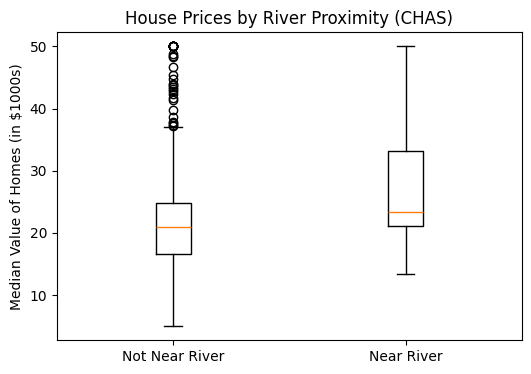

In [24]:
river = boston_df[boston_df["CHAS"] == 1]["MEDV"]
non_river = boston_df[boston_df["CHAS"] == 0]["MEDV"]

plt.figure(figsize=(6, 4))
plt.boxplot([non_river, river], tick_labels=["Not Near River", "Near River"])
plt.title("House Prices by River Proximity (CHAS)")
plt.ylabel("Median Value of Homes (in $1000s)")
plt.show()


#### How the median values of houses vary with the proportion of owner-occupied units built before 1940.

In [17]:
boston_df['AGE'].corr(boston_df['MEDV'])

np.float64(-0.3769545650045963)

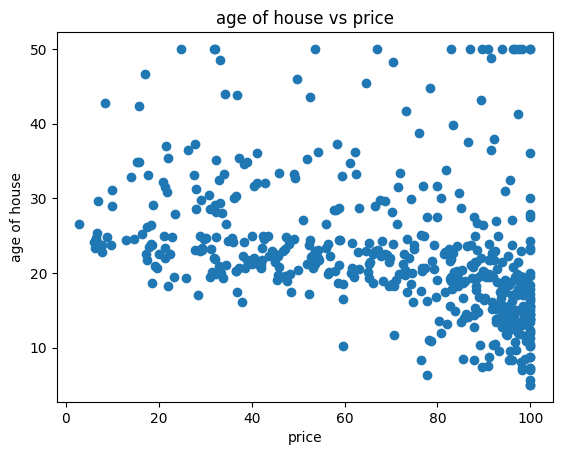

In [18]:
plt.scatter(boston_df['AGE'], boston_df['MEDV'])
plt.xlabel("price")
plt.ylabel("age of house")
plt.title("age of house vs price")
plt.show()


#### Whether there is any relationship between Nitric Oxide (NO) concentrations and the proportion of non-retail business acres per town.

In [19]:
boston_df["NOX"].corr(boston_df["INDUS"])


np.float64(0.7636514469209152)

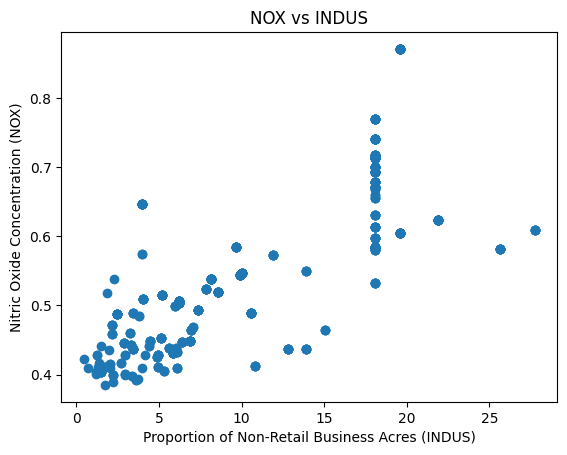

In [20]:
plt.scatter(boston_df["INDUS"], boston_df["NOX"])
plt.xlabel("Proportion of Non-Retail Business Acres (INDUS)")
plt.ylabel("Nitric Oxide Concentration (NOX)")
plt.title("NOX vs INDUS")
plt.show()


#### The impact of an additional weighted distance to the five Boston employment centers on the median value of owner-occupied homes

In [21]:
boston_df["DIS"].corr(boston_df["MEDV"])


np.float64(0.24992873408590388)

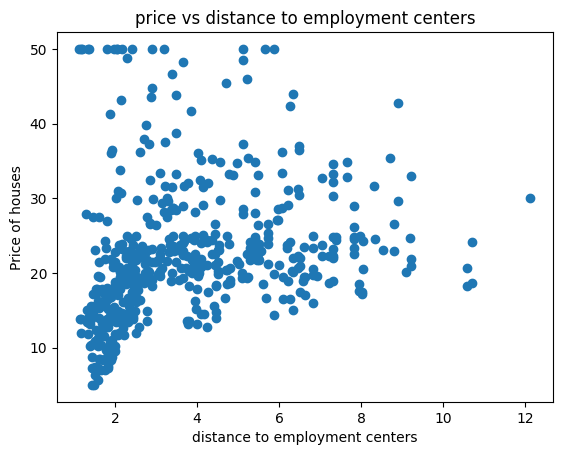

In [22]:
plt.scatter(boston_df["DIS"], boston_df["MEDV"])
plt.xlabel('distance to employment centers')
plt.ylabel('Price of houses')
plt.title("price vs distance to employment centers")
plt.show()